## Import Data and Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Import CSV data as Pandas Dataframe

In [2]:
df = pd.read_csv('Complete_student_dataset.csv')

#### load first five records from dataset 

In [3]:
df.head()

,Exam_Scores,Attendance,Study_Hours,Social_Activity,Gender,Homework_Completion,Tutoring_Hours,Extracurricular_Activities,Health_Score,Performance
0,78,89,7.725720,66.0,Female,84,0.256777,Music,68.0,average
1,91,86,9.613415,50.0,Male,91,2.284873,Music,60.0,good
2,68,99,4.418243,96.0,Female,83,2.307290,Sports,61.0,average
3,54,86,4.932728,91.0,Male,79,3.803026,Debate,NaN,poor
4,82,95,1.866064,NaN,Male,62,1.539161,Sports,92.0,poor


#### Shape of Dataset

In [4]:
df.shape

(250, 10)

#### Describing the dataset by displaying basic statistics

In [5]:
df.describe()

,Exam_Scores,Attendance,Study_Hours,Social_Activity,Homework_Completion,Tutoring_Hours,Health_Score
count,250.000000,250.000000,250.000000,238.000000,250.000000,250.000000,238.000000
mean,69.832000,84.608000,5.379290,48.970588,75.260000,2.541986,79.386555
std,17.411733,9.320182,2.543950,29.672815,14.423333,1.493026,11.174949
min,40.000000,70.000000,1.040869,0.000000,50.000000,0.025812,60.000000
25%,54.000000,76.000000,3.291859,23.250000,62.000000,1.213403,70.000000
50%,69.500000,86.000000,5.345501,45.500000,77.000000,2.539985,80.000000
75%,83.000000,93.000000,7.332973,77.750000,87.000000,3.836413,89.000000
max,99.000000,99.000000,9.969914,99.000000,99.000000,4.994866,99.000000


####  Checking the number of unique values of each column

In [6]:
df.nunique()

Exam_Scores                    58
Attendance                     30
Study_Hours                   250
Social_Activity                93
Gender                          2
Homework_Completion            49
Tutoring_Hours                250
Extracurricular_Activities      4
Health_Score                   40
Performance                     3
dtype: int64

#### Check data types  - Check Null values and dtype

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Exam_Scores                 250 non-null    int64  
 1   Attendance                  250 non-null    int64  
 2   Study_Hours                 250 non-null    float64
 3   Social_Activity             238 non-null    float64
 4   Gender                      250 non-null    object 
 5   Homework_Completion         250 non-null    int64  
 6   Tutoring_Hours              250 non-null    float64
 7   Extracurricular_Activities  250 non-null    object 
 8   Health_Score                238 non-null    float64
 9   Performance                 250 non-null    object 
dtypes: float64(4), int64(3), object(3)
memory usage: 19.7+ KB


Here null values are present on Social_Activity and Health_Score columns. So we should deal with them.

#### Checking total number of null values 

In [8]:
df.isnull().sum()

Exam_Scores                    0
Attendance                     0
Study_Hours                    0
Social_Activity               12
Gender                         0
Homework_Completion            0
Tutoring_Hours                 0
Extracurricular_Activities     0
Health_Score                  12
Performance                    0
dtype: int64

#### Handling missing data using mean function

In [9]:
df['Social_Activity'].fillna(df['Social_Activity'].mean(), inplace = True)
df['Health_Score'].fillna(df['Health_Score'].mean(), inplace = True)

In [10]:
df.isnull().sum()

Exam_Scores                   0
Attendance                    0
Study_Hours                   0
Social_Activity               0
Gender                        0
Homework_Completion           0
Tutoring_Hours                0
Extracurricular_Activities    0
Health_Score                  0
Performance                   0
dtype: int64

Here we have replaced the null values with their appropriate mean values

In [11]:
df.head()

,Exam_Scores,Attendance,Study_Hours,Social_Activity,Gender,Homework_Completion,Tutoring_Hours,Extracurricular_Activities,Health_Score,Performance
0,78,89,7.725720,66.000000,Female,84,0.256777,Music,68.000000,average
1,91,86,9.613415,50.000000,Male,91,2.284873,Music,60.000000,good
2,68,99,4.418243,96.000000,Female,83,2.307290,Sports,61.000000,average
3,54,86,4.932728,91.000000,Male,79,3.803026,Debate,79.386555,poor
4,82,95,1.866064,48.970588,Male,62,1.539161,Sports,92.000000,poor


## Box Plot for visualizing Exam Scores by Performance 

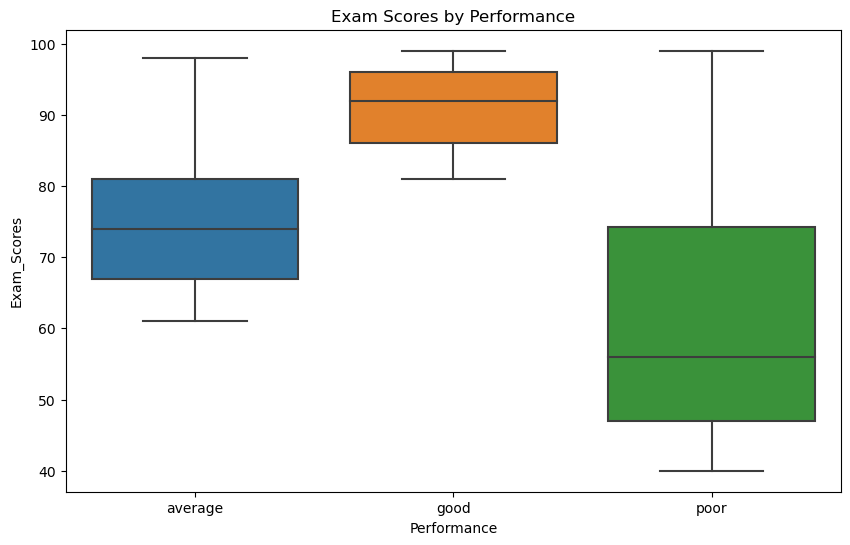

In [12]:
#visualizing the data
plt.figure(figsize = (10,6))
sns.boxplot(x = 'Performance', y ='Exam_Scores', data = df)
plt.title('Exam Scores by Performance')
plt.show()

## Bar Chart for Study Hours by Performance

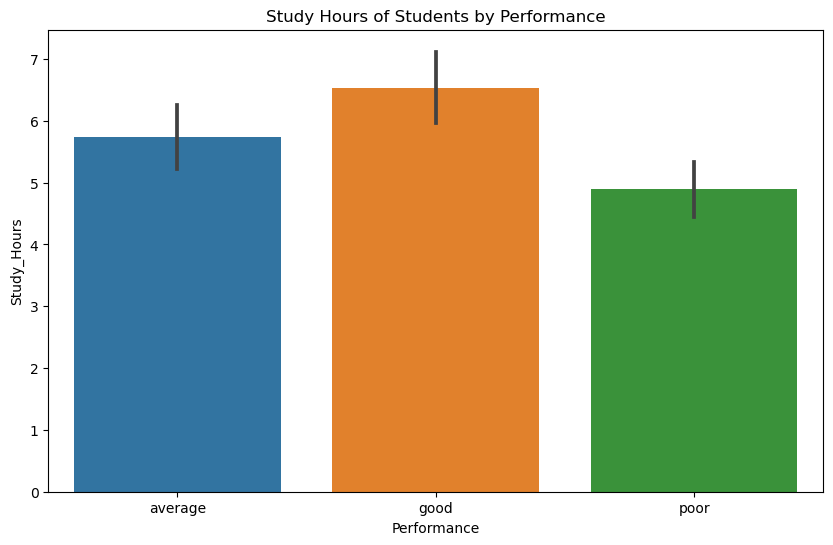

In [13]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Performance', y = 'Study_Hours', data = df)
plt.title('Study Hours of Students by Performance')
plt.show()

## Count Plot for Extracurricular Activities by Performance

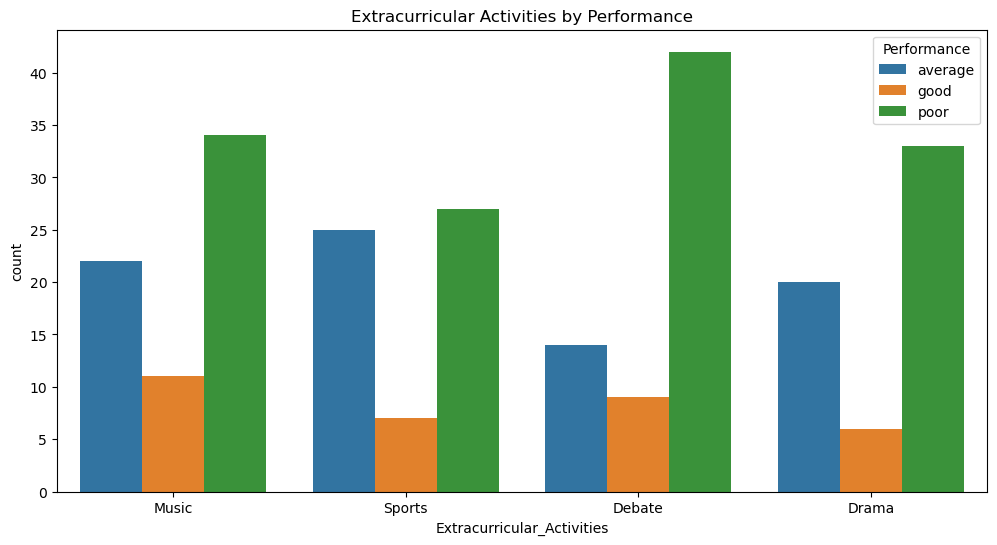

In [14]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Extracurricular_Activities', hue = 'Performance', data = df)
plt.title('Extracurricular Activities by Performance')
plt.show()

## Machine Learning Model Creation 

#### Convert Categorical Variables into Numerical Variables Using Label Encoder

In [15]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Extracurricular_Activities'])

In [16]:
df.head()

,Exam_Scores,Attendance,Study_Hours,Social_Activity,Gender,Homework_Completion,Tutoring_Hours,Health_Score,Performance,Extracurricular_Activities_Debate,Extracurricular_Activities_Drama,Extracurricular_Activities_Music,Extracurricular_Activities_Sports
0,78,89,7.725720,66.000000,0,84,0.256777,68.000000,average,0,0,1,0
1,91,86,9.613415,50.000000,1,91,2.284873,60.000000,good,0,0,1,0
2,68,99,4.418243,96.000000,0,83,2.307290,61.000000,average,0,0,0,1
3,54,86,4.932728,91.000000,1,79,3.803026,79.386555,poor,1,0,0,0
4,82,95,1.866064,48.970588,1,62,1.539161,92.000000,poor,0,0,0,1


Here we have changed the categorical data in Gender and Extracurricular_Activities columns into numerical data. 

#### Training the Model using Random Forest Classifier

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [41]:
#spliting the data into independent variable and dependent variable
X = df.drop('Performance', axis = 1) # X values will drop performance column and return other columns
y = df['Performance']

In [25]:
X.head()

,Exam_Scores,Attendance,Study_Hours,Social_Activity,Gender,Homework_Completion,Tutoring_Hours,Health_Score,Extracurricular_Activities_Debate,Extracurricular_Activities_Drama,Extracurricular_Activities_Music,Extracurricular_Activities_Sports
0,78,89,7.725720,66.000000,0,84,0.256777,68.000000,0,0,1,0
1,91,86,9.613415,50.000000,1,91,2.284873,60.000000,0,0,1,0
2,68,99,4.418243,96.000000,0,83,2.307290,61.000000,0,0,0,1
3,54,86,4.932728,91.000000,1,79,3.803026,79.386555,1,0,0,0
4,82,95,1.866064,48.970588,1,62,1.539161,92.000000,0,0,0,1


In [26]:
y.head()

0    average
1       good
2    average
3       poor
4       poor
Name: Performance, dtype: object

So here we got dependent variable and independent variables for training

In [27]:
#Spliting dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Using Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

#### Predicting the test set 

In [28]:
y_pred = model.predict(X_test)

#### Evaluating the Model and Finding Accuracy

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Model is :", accuracy)

Accuracy of the Model is : 0.84


#### Printing the Classification Report 

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     average       0.92      0.63      0.75        19
        good       0.00      0.00      0.00         1
        poor       0.83      1.00      0.91        30

    accuracy                           0.84        50
   macro avg       0.59      0.54      0.55        50
weighted avg       0.85      0.84      0.83        50

